<a href="https://colab.research.google.com/github/rjy1022/my_assets/blob/main/Principal_Components_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This notebook contains modified excerpts from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook). The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).  In addition, aspects have been adapted from the Neuromatch course materials [here](https://github.com/NeuromatchAcademy/course-content/blob/master/tutorials/README.md).*

For this exercise, we will explore Principal Components Analysis (PCA) on both simulated and real data.  Like last time, all questions to be answered will be in <font color="blue"> blue</font> and places to write your answers will be in <font color="green"> green</font>.  Sean and I will be moving through the breakout rooms to help.

In [ ]:
#import various useful packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from sklearn.decomposition import PCA
%matplotlib inline

## Introducing Principal Components Analysis

As we saw in lecture, Principal Components Analysis (PCA) is a fast and broadly-applicable unsupervised method for dimensionality reduction, finding a rotation of a data set into a low-dimensional space that captures as much linear correlation as possible.  While this is somewhat of a mouthful, its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

In [ ]:
X.shape

(200, 2)

In [ ]:
rng.rand(2, 2)

array([[0.78218182, 0.05614104],
       [0.8352716 , 0.19225002]])

In [ ]:
rng.randn(2, 2)

array([[ 1.69380911,  0.19686978],
       [ 0.16986926, -1.16400797]])

In [ ]:
np.dot

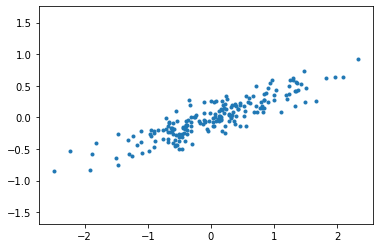

In [ ]:
rng = random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.plot(X[:, 0], X[:, 1],'.')
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.  This is reminiscent of linear regression, but the problem here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [ ]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The PCA fit learns some useful quantities from the data, most importantly the "components" and "explained variance" (i.e., $\frac{\lambda_k}{\sum_{i=1}^d \lambda_i}$, where $\lambda_k$ is the $k^{th}$ largest eigenvalue):

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

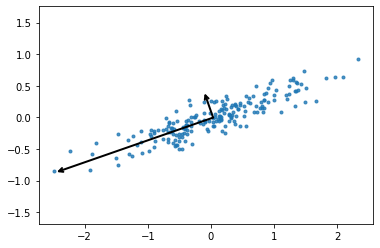

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.plot(X[:, 0], X[:, 1],'.',alpha=0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is proportional to the eigenvalue that corresponds to the plotted eigenvector.  The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

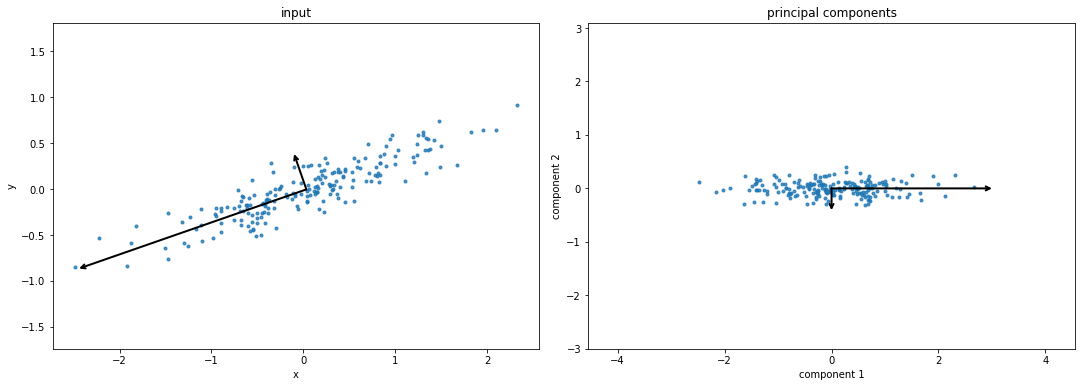

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].plot(X[:, 0], X[:, 1],'.', alpha=0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].plot(X_pca[:, 0], X_pca[:, 1],'.', alpha=0.8)
draw_vector([0, 0], [0, -3*np.sqrt(pca.explained_variance_[1])], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))
plt.show()

You can see that now, almost all of the data lie near the line.  Thus, we can see that using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform - performing principle components, taking only the first eigenvalue projection, and then histogramming the results.

original shape:    (200, 2)
transformed shape: (200, 2)


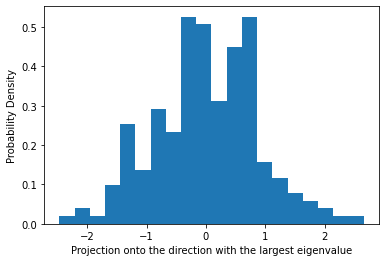

In [ ]:
pca = PCA()
pca.fit(X)
Y = pca.transform(X)
plt.hist(Y[:,0],20,density=True)
plt.xlabel('Projection onto the direction with the largest eigenvalue')
plt.ylabel('Probability Density')
print("original shape:   ", X.shape)
print("transformed shape:", Y.shape)
plt.show()

##Syntax for PCA in ```sklearn.decomposition```

As is often seen in python, the ```sklearn``` version of PCA is an example of a *class* data structure.  This type of data structure is rather convenient, as it allows the users to manipulate variables in a systematic manner.  Although a complete description and some examples are [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform), we will go over the important basics in this tutorial.  As we move towards using other dimensionality reduction techniques, you will find that ```sklearn``` often will use similar syntax for those methods as well.

The first step will be to initialize a ```PCA``` class like so:

In [ ]:
pca_example = PCA()
#Note, there are a number of options, such as limiting the number of components 
#   or equalizing the variance that are described in the link in the previous
#   paragraph.  We will not need them today, but they might be useful in the future

This class (here, ```pca_example```) will contain several helper functions and will store variables that result from applying PCA to that dataset.

Now, let's say that we have a dataset, $X\in\Re^{N\times d}$, to which we would like to apply PCA.  To achieve this, we would use:

In [ ]:
pca_example.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Note here, that we didn't create a new variable.  ```pca_example``` will carry all of the results along with it.  

For example, to return the eigenvalues (sorted from largest to smallest) from running PCA, we can type:

In [ ]:
example_pca_eigenvalues = pca_example.explained_variance_

This will return a $d$-dimensional numpy array of eigenvalues.

Similarly, if you would like the relative variance explained in each mode $\left(\frac{\lambda_k}{\sum_{\ell=1}^d \lambda_\ell} \right)$, then you can enter:

In [ ]:
example_pca_relative_variance = pca_example.explained_variance_ratio_

In addition, ```pca_example.components_```, returns the eigenvectors (as row vectors) resulting from applying PCA, ordered in the same manner as the eigenvalues.  For example, the first eigenvector would be ```pca_example.components_[0,:]```.

Lastly, we often would like to calculate the projections onto the first $m$ eigenvectors ($\{\vec{x_i}\cdot \hat{v}_k\}_{k=1,\ldots , m}$).  These projections are the low-dimensional representation that we were aiming to find in the first place.  To return these values, we can use:

In [ ]:
projections = pca_example.transform(X)

where ```X``` is the original dataset that you started out with (or another data set altogether if you wanted) and ```projections``` is an $N\times d$ matrix of the projections onto the eigenvectors.

If you want to test these functions out, I would recommend using ```X = random.randn(N,d)``` or something similar, and you can see how they work.

##PCA on hand-written digits

Now to try PCA out on some real data.  The MNIST dataset consists of a 70,000 images of individual handwritten digits. Each image is a 28x28 pixel grayscale image. For convenience, each 28x28 pixel image is often unravelled into a single 784 (=28*28) element vector, so that the whole dataset is represented as a 70,000 x 784 matrix. Each row represents a different image, and each column represents a different pixel.

First, press enter on the cell below, as it will introduce several MNIST-specific helper functions into the workspace.  If you are curious, you can open it up and see what the code is doing after the tutorial today!

In [ ]:
# @title Helper Functions



def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(10):
    for k2 in range(10):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((10 * 28, 0))
  plt.ylim((10 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 255])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  Z = np.zeros((28*4,28*6))
  k = 0
  for i in range(4):
    xstart = 0 + i*28
    xend = (i+1)*28
    for j in range(6):
      ystart = 0 + j*28
      yend = (j+1)*28
      Z[xstart:xend,ystart:yend] = np.real(np.reshape(weights[k,:], (28, 28)))
      k += 1
  #plt.imshow(np.real(np.reshape(weights[i,:], (28, 28))), cmap=cmap)
  plt.imshow(Z,cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def add_noise(X, frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.

  Args:
     X (numpy array of floats)  : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels

  Returns:
     (numpy array of floats)    : Data matrix + noise

  """

  X_noisy = np.reshape(X, (X.shape[0] * X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0], size=N_noise_ixs,
                               replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0, 255, noise_ixs.shape)
  X_noisy = np.reshape(X_noisy, (X.shape[0], X.shape[1]))

  return X_noisy




Now enter the following cell to load the MNIST dataset.  To provide a sense of the data, the code will also plot 100 of the digits.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
digitData = mnist.data
#plot_MNIST_sample(digitData)

### MNIST eigenvalues

The MNIST dataset has an measured dimensionality of 784! To make sense of this data, we'll need to use dimensionality reduction. But first, we need to determine the intrinsic dimensionality, $m$, of the data. One way to do this is to look for an "elbow" in the eigenvalue plot, to determine which eigenvalues are signficant.

<font color="blue"> Question #1: Apply PCA to this data set (call the class ```digitPCA```), and plot the 100 largest eigenvalues.  Can you identify an "elbow" in the eigenvalue plot?  If so, where do you think it is located? </font>

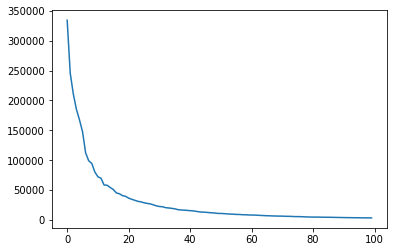

In [ ]:
digitPCA = PCA()
digitPCA.fit(digitData)
eigenvalues = digitPCA.explained_variance_
plt.plot(eigenvalues[:100])
plt.show()

<font color="green">Can you identify an "elbow" in the eigenvalue plot?  If so, where do you think it is located?

It looks like there is a bend starting around 10 and ending around 18.</font>

<font color="blue"> Question #2: Now plot the cumulative fraction of variance explained as a function of the number of dimensions included from 1 up to 100 dimensions (```np.cumsum()``` will be helpful).  How many dimensions do you need to explain 50% of the variance? 80%? 90%? Compare these numbers to your answer for Question #1.</font>

86


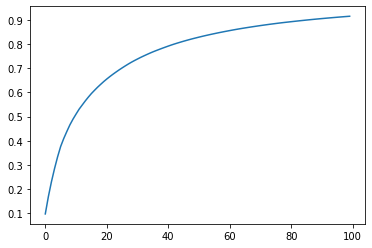

In [ ]:
rel_var = digitPCA.explained_variance_ratio_
rel_vars = np.cumsum(rel_var[:100])
plt.plot(rel_vars)
for i,x in enumerate(rel_vars):
  if x > .9:
    print(i)
    break


<font color="green"> How many dimensions do you need to explain 50% of the variance? 80%? 90%?  Compare these numbers to your answer for Question #1.

We need 10 dimensions to explain 50% of the variance, 42 to explain 80%, and 86 to explain 90%.

In question #1, we said that there was an elbow in the range of 10-18, and it seems that this result supports that. Most (>50%) of the variance is explained in these first eigenvalues.</font>

###Shuffled eigenvalues

One standard way to determine how many modes one should use in a PCA decomposition is to compare the found eigenvalues with the eigenvalues from applying PCA to the same data set, but with each column shuffled independently from one another. 

We start by making a copy of our original array (to make sure that we don't overwrite it).

In [ ]:
shuffledDigitData = np.copy(digitData)

<font color="blue">Question #3: Shuffle this copied data matrix so that each column is shuffled independently (```random.shuffle()``` will be useful here - see the previous in-class exercise for an example)  and apply PCA to this new, shuffled, data set.</font>

In [ ]:
for i in range(784):
  random.shuffle(shuffledDigitData[:,i])

<font color="blue">Question #4: Plot the first 100 eigenvalues from both the actual data PCA and the shuffled data PCA on the same plot (but with different colors).  Based on this plot, how many modes do you think we should keep?  Why?</font>

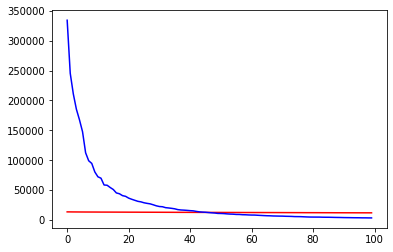

In [ ]:
shuffledPCA = PCA()
shuffledPCA.fit(shuffledDigitData)
shuffled_eigenvalues = shuffledPCA.explained_variance_
plt.plot(shuffled_eigenvalues[:100], color="Red")
plt.plot(eigenvalues[:100], color="Blue")
plt.show()

<font color="green"> Based on this plot, how many modes do you think we should keep? Why?

We should stop taking modes around 45 (or wherever they intersect).  </font>

<font color="blue">Question #5: Is this number of modes larger or smaller than you would have expected before performing the analysis?  Why?  What assumptions does PCA make that could be affecting this result?</font>

<font color="green"> Enter your answer to Question #5 here.

It seems smaller than we'd expect, as since we begin with 784 dimensions, it seems strange to only need to pay attention to 45 to capture most of the variance in the data set.</font>

###MNIST eigenvectors

As well as the eigenvalues, we can also look at the eigevectors as well.  However, because the eigenvectors are in a high dimension ($d=784$!), they are hard to visualize.  Fortunately, however, we can look at these vectors not as vectors, per se, but as images.

The code below will plot the first 24 eigenvectors from left to right, then top to bottom (i.e, [[1,2,3,4,5,6],[7,8,9,10,11,12],...,...), with red and blue depicting opposite directions.

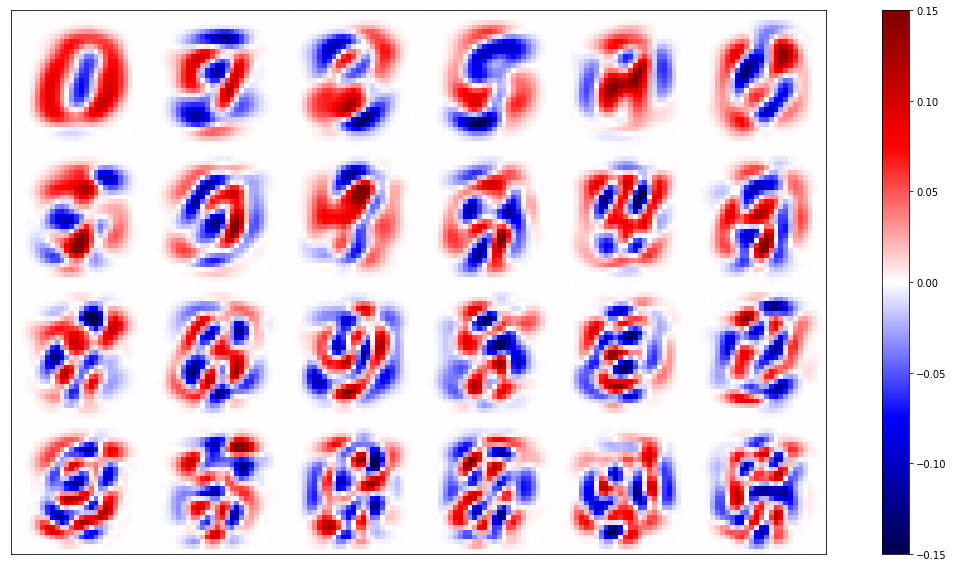

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plot_MNIST_weights(digitPCA.components_)

<font color="blue">Question # 6: Describe how the eigenvectors are changing as we go from a low mode (top left) to higher modes (top right).  Do they look like numbers? Why or why not might this be?</font>

<font color="green"> The first couple eigenvectors more accurately resemble numbers. As we go on, the eigenvectors become more abstract. This is because we begin with a best fit basis, and each consecutive basis must be orthagonal to the first. The result of this is that after the first five or so eigenvectors, we don't have perfect representation of numbers in their entirety or even parts of numbers. The computer effectively overfits the data.</font>

###MNIST projections

For the last section, we will look at the projections onto the PCA eigenvectors

<font color = "blue">Question 7: Use the ```transform()``` member function of ```PCA``` to return the projections of the high-dimensional points onto a low-dimensional space.  Call these projections, ```projections```.Plot a histogram of the projections onto the first eigenvector.  Does the histogram look symmetric?  What might this symmetry or asymmetry tell us about the data set?</font>

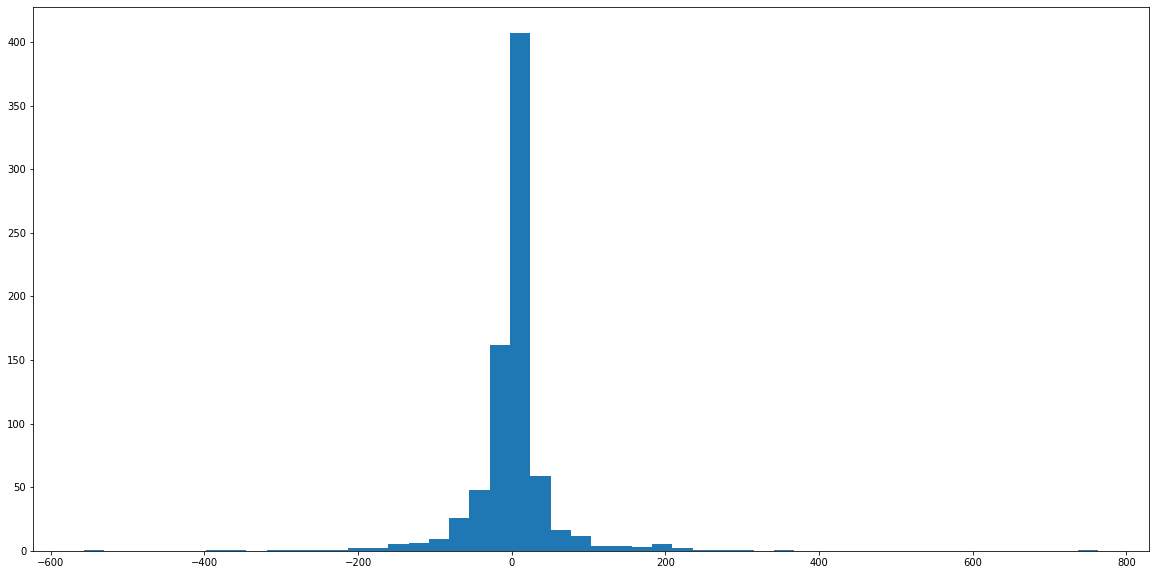

In [ ]:
projections = digitPCA.transform(digitData)
#print(projections[0])
plt.hist(projections[0], 50)
plt.show()


<font color="green">Does the histogram look symmetric? What might this symmetry or asymmetry tell us about the data set?

Not completely, but pretty much. The way we interpreted the graph was that x was the dot product between the image vector and the first eigenvector. In this way, a large positive x value would represent similarity, a large negative x value would represent dissimilarity, and an x value of 0 would represent unrelated data. You'd mentioned in class that in high-dimensional data, two random vectors were likely to have a dot product around zero. We see this play out here. The symmetry and distribution tells us that most images in the data set are not explained or unexplained (negative) by mapping them onto the first eigenvector, but that a few match up very well, and some map very poorly. </font>

Given these projections, we can now see if the low-dimensional representation that PCA provides can tell us something about the structure of the data.  The code below picks a random number of points from the data set (otherwise it would be way to hard to see!) and plots the projections on the two different eigenvectors against each other.  The points are colored based on the known digit values (as per the colorbar).  You can change the number of random points, the mode on the x-axis, and the mode on the y-axis.  The default is to plot the first to projections against each other (```0``` and ```1```).

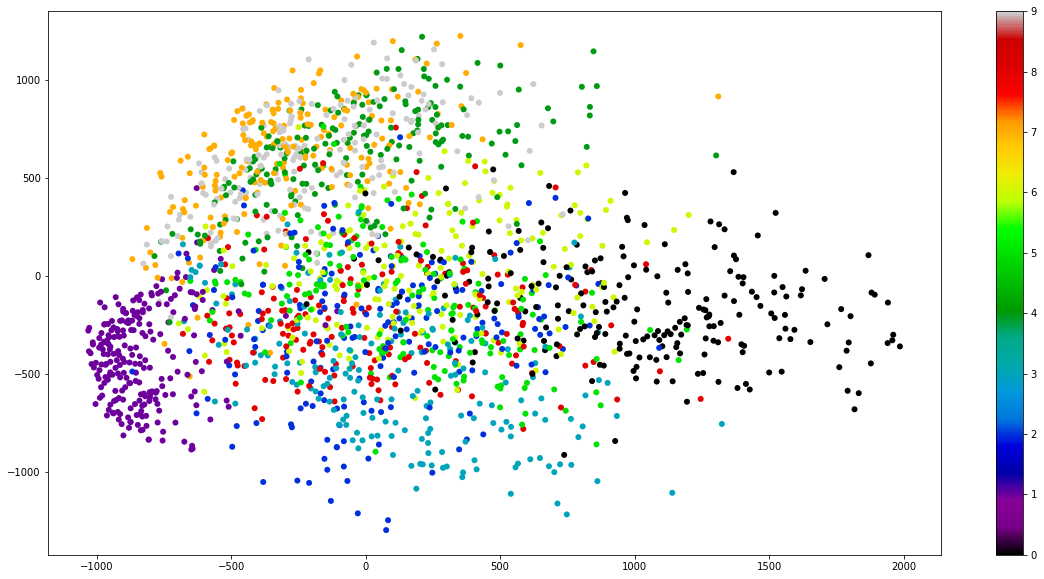

In [ ]:
numToPlot = 2000 #number of random samples to choose (I recommend 2000)
mode1 = 0 # PCA direction to plot on the x-axis of the plot below
mode2 = 1 # PCA direction to plot on the y-axis of the plot below

plt.rcParams["figure.figsize"] = (20,10)
idx = random.choice(range(len(projections[:,0])),numToPlot)
plt.scatter(projections[idx,mode1],projections[idx,mode2],c=mnist.target.astype(np.int)[idx],edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'))
plt.colorbar();


<font color = "blue">Question 8: Run the code above for ```mode1 = 0``` and ```mode2 = 1```.  Is it possible to easily tell apart numbers in this representation?  Which number(s) are easiest to tell apart and which number(s) are hardest?  Given how the numbers look, do these observations make sense to you?</font>

<font color="green">Type answer for Question #8 here.

Some of the numbers are better distinguished than others. For example, the number 1 is pretty well clustered. The next easiest, it seems, to distinguish is the number 0. It looks like the number 2 has the worst clustering, though 5 and 8 are also pretty bad. These observations make sense to me. When we plotted the eigenvectors for the first couple modes, the first eigenvector looked like it would distinguish 0s and 1s pretty well, and in fact, we do see 0s and 1s spread far apart on the x axis. Even on the second eigenvector, it becomes harder to tell which features it is looking to pull out, but it looks like it would separate 9s and 1s pretty well, and we see this confirmed as well.</font>

<font color="blue">Question 9: Now run this code a few times (you can copy and paste below) three different combinations of ```mode1``` and ```mode2``` (keeping ```mode1``` < ```mode2``` and ```mode2``` $\le 10$).  Are the numbers more or less distinguishable now?  Why might that be?</font>

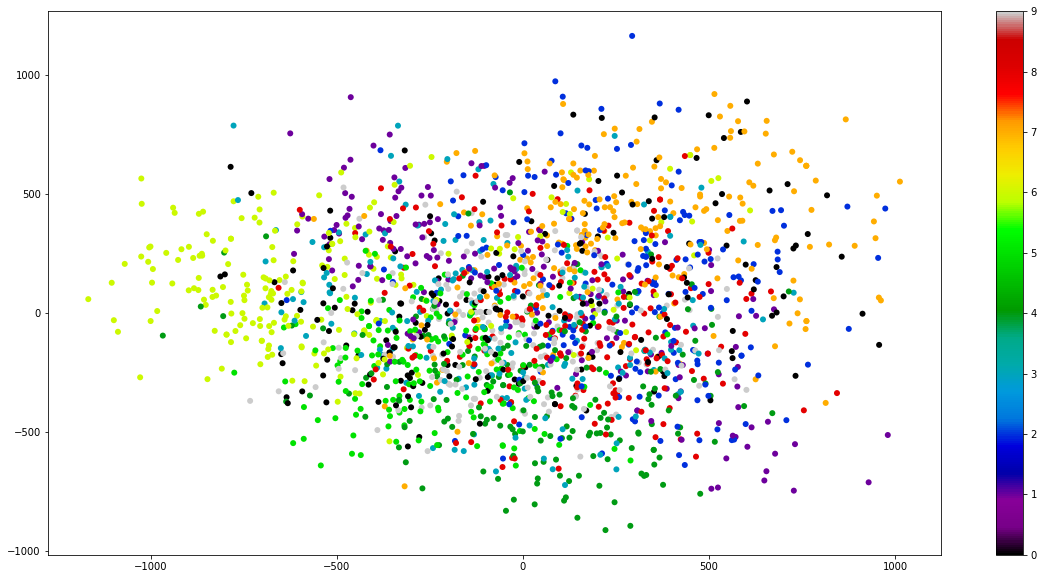

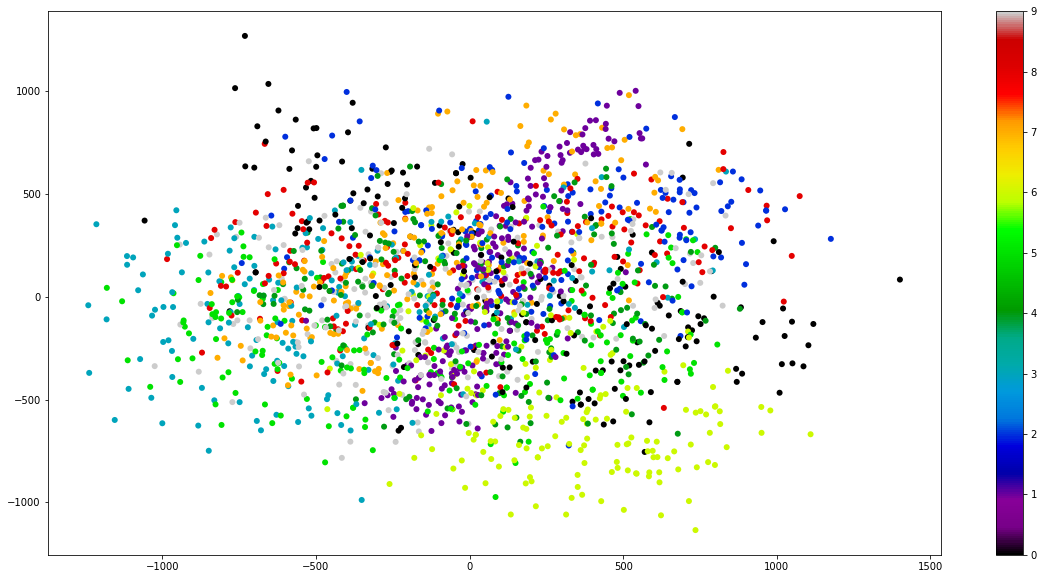

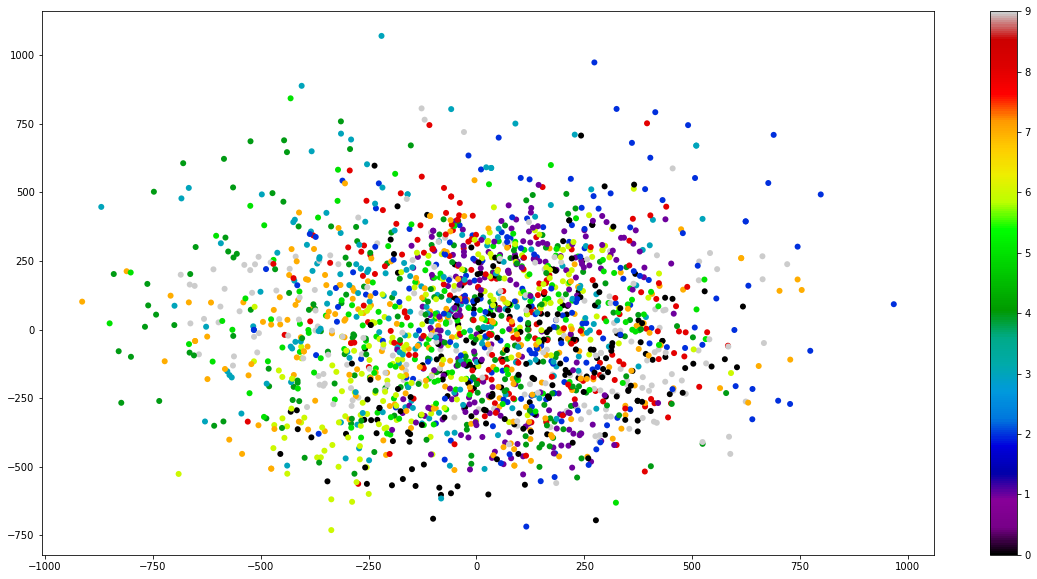

In [ ]:
numToPlot = 2000 #number of random samples to choose (I recommend 2000)
mode1 = 5 # PCA direction to plot on the x-axis of the plot below
mode2 = 6 # PCA direction to plot on the y-axis of the plot below

plt.rcParams["figure.figsize"] = (20,10)
idx = random.choice(range(len(projections[:,0])),numToPlot)
plt.scatter(projections[idx,mode1],projections[idx,mode2],c=mnist.target.astype(np.int)[idx],edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'))
plt.colorbar();

# Let's distinguish 8's
numToPlot = 2000 #number of random samples to choose (I recommend 2000)
mode1 = 2 # PCA direction to plot on the x-axis of the plot below
mode2 = 5 # PCA direction to plot on the y-axis of the plot below

plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
idx = random.choice(range(len(projections[:,0])),numToPlot)
plt.scatter(projections[idx,mode1],projections[idx,mode2],c=mnist.target.astype(np.int)[idx],edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'))
plt.colorbar();

# Let's see how bad it is
numToPlot = 2000 #number of random samples to choose (I recommend 2000)
mode1 = 9 # PCA direction to plot on the x-axis of the plot below
mode2 = 10 # PCA direction to plot on the y-axis of the plot below

plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
idx = random.choice(range(len(projections[:,0])),numToPlot)
plt.scatter(projections[idx,mode1],projections[idx,mode2],c=mnist.target.astype(np.int)[idx],edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'))
plt.colorbar();

<font color="green">The numbers mostly become more difficult to see. But in the first one, with modes 5 and 6, the number 6 is surprisingly well-clustered. Looking at eigenvector 6, I thought that it would be the reason for this, but with modes 2 and 5, the number 6 is well-clustered as well. The last one, with modes 9 and 10, is pretty much mush. Nothing can easily be told apart or identified as belonging to a cluster.</font>